In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

/home/noname/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or you can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
```

In [2]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-16 20:50:12--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [       <=>          ] 999,85K   710KB/s    in 1,4s    

2024-10-16 20:50:15 (710 KB/s) - ‘bank+marketing.zip’ saved [1023843]



We need to take `bank/bank-full.csv` file from the downloaded zip-file.  
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not. 

In [3]:
!unzip bank+marketing.zip

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     


In [4]:
!unzip bank.zip

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- `secondary` ✅
- `tertiary`


In [10]:
data = pd.read_csv("bank-full.csv", sep=";")
data = data[['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]
data.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
data.mode()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,blue-collar,married,secondary,0,yes,cellular,20,may,124,1,-1,0,unknown,no


In [12]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

# Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- `pdays` and `previous` ✅




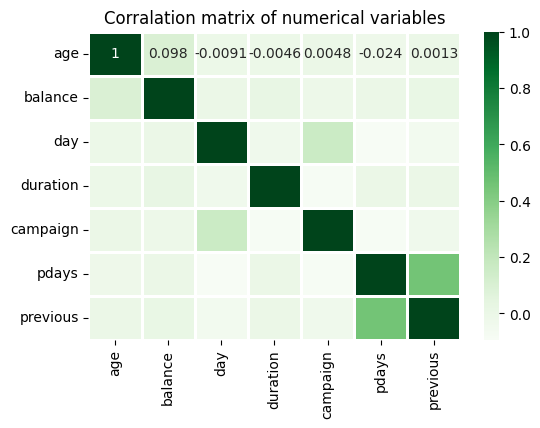

In [15]:
plt.figure(figsize=(6,4))  
sns.heatmap(data.corr(), annot=True, linewidths=.8, cmap="Greens")
plt.title('Corralation matrix of numerical variables')
plt.show()

## Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.



In [18]:
data.y.apply(lambda x: 1 if x == 'yes' else 0)
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)
data.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

## Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [20]:
y = data['y']
X = data.drop(columns=['y'])
X

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,ys
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [22]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- `poutcome` ✅

In [24]:
categorical_vars = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
mutual_inf_calc = []

for cat in categorical_vars:
    mi = round(mutual_info_score(X_train[cat], y_train), 2)
    mutual_inf_calc.append(mi)
    print("For {} the MI with y is: {}".format(cat, mi))


For job the MI with y is: 0.01
For marital the MI with y is: 0.0
For education the MI with y is: 0.0
For housing the MI with y is: 0.01
For contact the MI with y is: 0.01
For month the MI with y is: 0.03
For poutcome the MI with y is: 0.03


# Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9 ✅


In [28]:
# OHE
numerical = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [29]:
dicts_X_train = X_train[categorical_vars+numerical].to_dict(orient='records')

dv_train = DictVectorizer(sparse=False)

In [30]:
dv_train.fit(dicts_X_train)

DictVectorizer(sparse=False)

In [31]:
X_train_ohe = dv_train.transform(dicts_X_train)


In [69]:
# train the model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_ohe, y_train)

val_dict = X_test[categorical_vars + numerical].to_dict(orient='records')
X_val_ohe = dv_train.transform(val_dict)
y_pred = model.predict(X_val_ohe)

#accuracy of the model w/ val
accuracy = np.round(accuracy_score(y_test, y_pred),2)
print(accuracy)

0.9


# Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `age`
- `balance` ✅
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.



In [59]:
features = ['age', 'balance', 'marital', 'previous']
accuracies = []

for f in features:
    dicts_X_train_f = X_train.drop(columns=f).to_dict(orient='records')
    dv_train_f = DictVectorizer(sparse=False)
    dv_train_f.fit(dicts_X_train_f)
    X_train_ohe_f = dv_train_f.transform(dicts_X_train_f)
    
    # train the model
    model_f = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_f.fit(X_train_ohe_f, y_train)

    test_dict_f = X_test.drop(columns=f).to_dict(orient='records')
    X_test_ohe_f = dv_train_f.transform(test_dict_f)
    y_pred_f = model_f.predict(X_test_ohe_f)

    #accuracy of the model w/ val
    accuracy_f = np.round(accuracy_score(y_test, y_pred_f),25)
    accuracies.append(accuracy_f)
    print("removing feat. {}, the accuracy is {}, and the diff. having all feat. is {}:".format(f, accuracy_f, accuracy-accuracy_f))
    

removing feat. age, the accuracy is 0.899037929890523, and the diff. having all feat. is 0.0009620701094770201:
removing feat. balance, the accuracy is 0.8992590954329316, and the diff. having all feat. is 0.0007409045670684344:
removing feat. marital, the accuracy is 0.8987061815769103, and the diff. having all feat. is 0.001293818423089732:
removing feat. previous, the accuracy is 0.8988167643481145, and the diff. having all feat. is 0.0011832356518854947:


### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01  
- 0.1 ✅
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.


In [70]:
y = data['y']
X = data.drop(columns=['y'])

#re 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


cvalues = [0.01, 0.1, 1, 10, 100]
scores = []

for cval in cvalues:
    dicts_X_train_a = X_train.to_dict(orient='records')
    dv_train_a = DictVectorizer(sparse=False)
    dv_train_a.fit(dicts_X_train_a)
    X_train_ohe_a = dv_train_a.transform(dicts_X_train_a)
    
    # train the model
    model = LogisticRegression(solver='liblinear', C=cval, max_iter=1000, random_state=42)
    model.fit(X_train_ohe, y_train)

    val_dict = X_val[categorical_vars + numerical].to_dict(orient='records')
    X_val_ohe = dv_train.transform(val_dict)
    y_pred = model.predict(X_val_ohe)

    #accuracy of the model w/ val
    accuracy_cval = np.round(accuracy_score(y_val, y_pred),3)
    scores.append(accuracy_cval)
                    
    print("Accuracy of LinearRegression with alpha: {}: {}:".format(cval, accuracy_cval))

    

Accuracy of LinearRegression with alpha: 0.01: 0.899:
Accuracy of LinearRegression with alpha: 0.1: 0.901:
Accuracy of LinearRegression with alpha: 1: 0.901:
Accuracy of LinearRegression with alpha: 10: 0.901:
Accuracy of LinearRegression with alpha: 100: 0.901:
